In [1]:
import missingno as msno
from matplotlib import font_manager, rc
import warnings
from collections import Counter
import seaborn as sns
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")


warnings.filterwarnings("ignore")


font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
df = pd.read_excel("./dataset/2020년 01월  교통카드 통계자료.xls", sheet_name="지하철 노선별 역별 이용현황")
df

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2020-01,1호선,150,서울역,"1,650,264","1,534,553",2020-02-03 12:19:56
1,2020-01,1호선,151,시청,"730,464","740,806",2020-02-03 12:19:56
2,2020-01,1호선,152,종각,"1,254,792","1,200,414",2020-02-03 12:19:56
3,2020-01,1호선,153,종로3가,"983,376","934,675",2020-02-03 12:19:56
4,2020-01,1호선,154,종로5가,"762,484","758,771",2020-02-03 12:19:56
...,...,...,...,...,...,...,...
592,2020-01,우이신설선,4709,북한산보국문,"169,956","157,093",2020-02-03 12:19:56
593,2020-01,우이신설선,4710,정릉,"127,108","115,482",2020-02-03 12:19:56
594,2020-01,우이신설선,4711,성신여대입구(돈암),"101,807","115,170",2020-02-03 12:19:56
595,2020-01,우이신설선,4712,보문,"44,755","45,249",2020-02-03 12:19:56


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     597 non-null    object
 1   호선명     597 non-null    object
 2   역ID     597 non-null    int64 
 3   지하철역    597 non-null    object
 4   승차승객수   597 non-null    object
 5   하차승객수   597 non-null    object
 6   작업일시    597 non-null    object
dtypes: int64(1), object(6)
memory usage: 32.8+ KB


In [4]:
df["승차승객수"] = df["승차승객수"].apply(lambda x: x.replace(',', ''))
df["하차승객수"] = df["하차승객수"].apply(lambda x: x.replace(',', ''))
df

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2020-01,1호선,150,서울역,1650264,1534553,2020-02-03 12:19:56
1,2020-01,1호선,151,시청,730464,740806,2020-02-03 12:19:56
2,2020-01,1호선,152,종각,1254792,1200414,2020-02-03 12:19:56
3,2020-01,1호선,153,종로3가,983376,934675,2020-02-03 12:19:56
4,2020-01,1호선,154,종로5가,762484,758771,2020-02-03 12:19:56
...,...,...,...,...,...,...,...
592,2020-01,우이신설선,4709,북한산보국문,169956,157093,2020-02-03 12:19:56
593,2020-01,우이신설선,4710,정릉,127108,115482,2020-02-03 12:19:56
594,2020-01,우이신설선,4711,성신여대입구(돈암),101807,115170,2020-02-03 12:19:56
595,2020-01,우이신설선,4712,보문,44755,45249,2020-02-03 12:19:56


In [5]:
df["승차승객수"] = df["승차승객수"].astype(int)
df["하차승객수"] = df["하차승객수"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     597 non-null    object
 1   호선명     597 non-null    object
 2   역ID     597 non-null    int64 
 3   지하철역    597 non-null    object
 4   승차승객수   597 non-null    int32 
 5   하차승객수   597 non-null    int32 
 6   작업일시    597 non-null    object
dtypes: int32(2), int64(1), object(4)
memory usage: 28.1+ KB


In [6]:
del df["작업일시"]
df

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01,1호선,150,서울역,1650264,1534553
1,2020-01,1호선,151,시청,730464,740806
2,2020-01,1호선,152,종각,1254792,1200414
3,2020-01,1호선,153,종로3가,983376,934675
4,2020-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
592,2020-01,우이신설선,4709,북한산보국문,169956,157093
593,2020-01,우이신설선,4710,정릉,127108,115482
594,2020-01,우이신설선,4711,성신여대입구(돈암),101807,115170
595,2020-01,우이신설선,4712,보문,44755,45249


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     597 non-null    object
 1   호선명     597 non-null    object
 2   역ID     597 non-null    int64 
 3   지하철역    597 non-null    object
 4   승차승객수   597 non-null    int32 
 5   하차승객수   597 non-null    int32 
dtypes: int32(2), int64(1), object(3)
memory usage: 23.4+ KB


In [8]:
df = df[df.호선명 != "우이신설선"]
df

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01,1호선,150,서울역,1650264,1534553
1,2020-01,1호선,151,시청,730464,740806
2,2020-01,1호선,152,종각,1254792,1200414
3,2020-01,1호선,153,종로3가,983376,934675
4,2020-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
579,2020-01,9호선2~3단계,4134,송파나루,122505,129986
580,2020-01,9호선2~3단계,4135,한성백제,67733,61190
581,2020-01,9호선2~3단계,4136,올림픽공원(한국체대),172362,169937
582,2020-01,9호선2~3단계,4137,둔촌오륜,25599,24973


In [9]:
df = df[df.호선명 != "9호선2~3단계"]
df = df[df.호선명 != "공항철도 1호선"]
df = df[df.호선명 != "9호선"]
df = df[df.호선명 != "8호선"]
df = df[df.호선명 != "7호선"]
df = df[df.호선명 != "6호선"]
df = df[df.호선명 != "경강선"]
df = df[df.호선명 != "수인선"]
df = df[df.호선명 != "경춘선"]
df = df[df.호선명 != "경의선"]
df = df[df.호선명 != "장항선"]
df = df[df.호선명 != "중앙선"]
df = df[df.호선명 != "일산선"]
df = df[df.호선명 != "분당선"]
df = df[df.호선명 != "과천선"]
df = df[df.호선명 != "안산선"]
df = df[df.호선명 != "경원선"]
df = df[df.호선명 != "경인선"]
df = df[df.호선명 != "경부선"]







df


,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01,1호선,150,서울역,1650264,1534553
1,2020-01,1호선,151,시청,730464,740806
2,2020-01,1호선,152,종각,1254792,1200414
3,2020-01,1호선,153,종로3가,983376,934675
4,2020-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
420,2020-01,5호선,2557,방이,216059,220434
421,2020-01,5호선,2558,오금,100098,99646
422,2020-01,5호선,2559,개롱,194385,200202
423,2020-01,5호선,2560,거여,224193,210050


In [10]:
df

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01,1호선,150,서울역,1650264,1534553
1,2020-01,1호선,151,시청,730464,740806
2,2020-01,1호선,152,종각,1254792,1200414
3,2020-01,1호선,153,종로3가,983376,934675
4,2020-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
420,2020-01,5호선,2557,방이,216059,220434
421,2020-01,5호선,2558,오금,100098,99646
422,2020-01,5호선,2559,개롱,194385,200202
423,2020-01,5호선,2560,거여,224193,210050


In [11]:
df1 = pd.read_excel("./dataset/2020년 02월  교통카드 통계자료.xls", sheet_name="지하철 노선별 역별 이용현황")
df1

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2020-02,1호선,150,서울역,"1,160,634","1,099,847",2020-03-03 12:13:51
1,2020-02,1호선,151,시청,"570,486","574,490",2020-03-03 12:13:51
2,2020-02,1호선,152,종각,"985,030","954,849",2020-03-03 12:13:51
3,2020-02,1호선,153,종로3가,"720,541","684,877",2020-03-03 12:13:51
4,2020-02,1호선,154,종로5가,"571,657","571,588",2020-03-03 12:13:51
...,...,...,...,...,...,...,...
592,2020-02,우이신설선,4709,북한산보국문,"142,041","134,118",2020-03-03 12:13:51
593,2020-02,우이신설선,4710,정릉,"104,093","96,243",2020-03-03 12:13:51
594,2020-02,우이신설선,4711,성신여대입구(돈암),"77,186","86,418",2020-03-03 12:13:51
595,2020-02,우이신설선,4712,보문,"37,143","38,522",2020-03-03 12:13:51


In [12]:
df1["승차승객수"] = df1["승차승객수"].apply(lambda x: x.replace(',', ''))
df1["하차승객수"] = df1["하차승객수"].apply(lambda x: x.replace(',', ''))
df1["승차승객수"] = df1["승차승객수"].astype(int)
df1["하차승객수"] = df1["하차승객수"].astype(int)
del df1["작업일시"]


In [13]:
# del df["작업일시"]
df1


,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-02,1호선,150,서울역,1160634,1099847
1,2020-02,1호선,151,시청,570486,574490
2,2020-02,1호선,152,종각,985030,954849
3,2020-02,1호선,153,종로3가,720541,684877
4,2020-02,1호선,154,종로5가,571657,571588
...,...,...,...,...,...,...
592,2020-02,우이신설선,4709,북한산보국문,142041,134118
593,2020-02,우이신설선,4710,정릉,104093,96243
594,2020-02,우이신설선,4711,성신여대입구(돈암),77186,86418
595,2020-02,우이신설선,4712,보문,37143,38522


In [14]:
df1 = df1[df1.호선명 != "9호선2~3단계"]
df1 = df1[df1.호선명 != "공항철도 1호선"]
df1 = df1[df1.호선명 != "9호선"]
df1 = df1[df1.호선명 != "8호선"]
df1 = df1[df1.호선명 != "7호선"]
df1 = df1[df1.호선명 != "6호선"]
df1 = df1[df1.호선명 != "경강선"]
df1 = df1[df1.호선명 != "수인선"]
df1 = df1[df1.호선명 != "경춘선"]
df1 = df1[df1.호선명 != "경의선"]
df1 = df1[df1.호선명 != "장항선"]
df1 = df1[df1.호선명 != "중앙선"]
df1 = df1[df1.호선명 != "일산선"]
df1 = df1[df1.호선명 != "분당선"]
df1 = df1[df1.호선명 != "과천선"]
df1 = df1[df1.호선명 != "안산선"]
df1 = df1[df1.호선명 != "경원선"]
df1 = df1[df1.호선명 != "경인선"]
df1 = df1[df1.호선명 != "경부선"]
df1 = df1[df1.호선명 != "우이신설선"]


In [15]:
df1

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-02,1호선,150,서울역,1160634,1099847
1,2020-02,1호선,151,시청,570486,574490
2,2020-02,1호선,152,종각,985030,954849
3,2020-02,1호선,153,종로3가,720541,684877
4,2020-02,1호선,154,종로5가,571657,571588
...,...,...,...,...,...,...
420,2020-02,5호선,2557,방이,180355,184107
421,2020-02,5호선,2558,오금,87903,88254
422,2020-02,5호선,2559,개롱,162596,167272
423,2020-02,5호선,2560,거여,188403,177430


In [16]:
df2 = pd.read_excel("./dataset/2020년 03월  교통카드 통계자료.xls", sheet_name="지하철 노선별 역별 이용현황")
df2

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2020-03,1호선,150,서울역,"815,894","776,303",2020-04-03 11:28:36
1,2020-03,1호선,151,시청,"437,824","444,220",2020-04-03 11:28:36
2,2020-03,1호선,152,종각,"744,396","728,555",2020-04-03 11:28:36
3,2020-03,1호선,153,종로3가,"555,451","525,826",2020-04-03 11:28:36
4,2020-03,1호선,154,종로5가,"468,370","472,936",2020-04-03 11:28:36
...,...,...,...,...,...,...,...
592,2020-03,우이신설선,4709,북한산보국문,"122,641","116,649",2020-04-03 11:28:36
593,2020-03,우이신설선,4710,정릉,"90,982","84,947",2020-04-03 11:28:36
594,2020-03,우이신설선,4711,성신여대입구(돈암),"65,437","75,377",2020-04-03 11:28:36
595,2020-03,우이신설선,4712,보문,"32,254","33,285",2020-04-03 11:28:36


In [17]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     597 non-null    object
 1   호선명     597 non-null    object
 2   역ID     597 non-null    int64 
 3   지하철역    597 non-null    object
 4   승차승객수   597 non-null    object
 5   하차승객수   597 non-null    object
 6   작업일시    597 non-null    object
dtypes: int64(1), object(6)
memory usage: 32.8+ KB


In [18]:
df2["승차승객수"] = df2["승차승객수"].apply(lambda x: x.replace(',', ''))
df2["하차승객수"] = df2["하차승객수"].apply(lambda x: x.replace(',', ''))
df2["승차승객수"] = df2["승차승객수"].astype(int)
df2["하차승객수"] = df2["하차승객수"].astype(int)
del df2["작업일시"]


In [19]:
df2 = df2[df2.호선명 != "9호선2~3단계"]
df2 = df2[df2.호선명 != "공항철도 1호선"]
df2 = df2[df2.호선명 != "9호선"]
df2 = df2[df2.호선명 != "8호선"]
df2 = df2[df2.호선명 != "7호선"]
df2 = df2[df2.호선명 != "6호선"]
df2 = df2[df2.호선명 != "경강선"]
df2 = df2[df2.호선명 != "수인선"]
df2 = df2[df2.호선명 != "경춘선"]
df2 = df2[df2.호선명 != "경의선"]
df2 = df2[df2.호선명 != "장항선"]
df2 = df2[df2.호선명 != "중앙선"]
df2 = df2[df2.호선명 != "일산선"]
df2 = df2[df2.호선명 != "분당선"]
df2 = df2[df2.호선명 != "과천선"]
df2 = df2[df2.호선명 != "안산선"]
df2 = df2[df2.호선명 != "경원선"]
df2 = df2[df2.호선명 != "경인선"]
df2 = df2[df2.호선명 != "경부선"]
df2 = df2[df2.호선명 != "우이신설선"]

In [20]:
df2

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-03,1호선,150,서울역,815894,776303
1,2020-03,1호선,151,시청,437824,444220
2,2020-03,1호선,152,종각,744396,728555
3,2020-03,1호선,153,종로3가,555451,525826
4,2020-03,1호선,154,종로5가,468370,472936
...,...,...,...,...,...,...
420,2020-03,5호선,2557,방이,145436,149503
421,2020-03,5호선,2558,오금,76338,76976
422,2020-03,5호선,2559,개롱,130831,136524
423,2020-03,5호선,2560,거여,160593,151547


In [21]:
df3 = pd.read_excel("./dataset/2020년 04월  교통카드 통계자료.xls", sheet_name="지하철 노선별 역별 이용현황")
df3

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2020-04,1호선,150,서울역,"915,454","878,884",2020-05-03 10:27:18
1,2020-04,1호선,151,시청,"434,276","434,953",2020-05-03 10:27:18
2,2020-04,1호선,152,종각,"802,866","777,919",2020-05-03 10:27:18
3,2020-04,1호선,153,종로3가,"620,666","588,845",2020-05-03 10:27:18
4,2020-04,1호선,154,종로5가,"516,229","518,588",2020-05-03 10:27:18
...,...,...,...,...,...,...,...
594,2020-04,우이신설선,4709,북한산보국문,"130,474","122,704",2020-05-03 10:27:18
595,2020-04,우이신설선,4710,정릉,"99,508","91,081",2020-05-03 10:27:18
596,2020-04,우이신설선,4711,성신여대입구(돈암),"70,181","81,465",2020-05-03 10:27:18
597,2020-04,우이신설선,4712,보문,"34,486","34,951",2020-05-03 10:27:18


In [22]:
df3["승차승객수"] = df3["승차승객수"].apply(lambda x: x.replace(',', ''))
df3["하차승객수"] = df3["하차승객수"].apply(lambda x: x.replace(',', ''))
df3["승차승객수"] = df3["승차승객수"].astype(int)
df3["하차승객수"] = df3["하차승객수"].astype(int)
del df3["작업일시"]

In [23]:
df3 = df3[df3.호선명 != "9호선2~3단계"]
df3 = df3[df3.호선명 != "공항철도 1호선"]
df3 = df3[df3.호선명 != "9호선"]
df3 = df3[df3.호선명 != "8호선"]
df3 = df3[df3.호선명 != "7호선"]
df3 = df3[df3.호선명 != "6호선"]
df3 = df3[df3.호선명 != "경강선"]
df3 = df3[df3.호선명 != "수인선"]
df3 = df3[df3.호선명 != "경춘선"]
df3 = df3[df3.호선명 != "경의선"]
df3 = df3[df3.호선명 != "장항선"]
df3 = df3[df3.호선명 != "중앙선"]
df3 = df3[df3.호선명 != "일산선"]
df3 = df3[df3.호선명 != "분당선"]
df3 = df3[df3.호선명 != "과천선"]
df3 = df3[df3.호선명 != "안산선"]
df3 = df3[df3.호선명 != "경원선"]
df3 = df3[df3.호선명 != "경인선"]
df3 = df3[df3.호선명 != "경부선"]
df3 = df3[df3.호선명 != "우이신설선"]

In [24]:
df3

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-04,1호선,150,서울역,915454,878884
1,2020-04,1호선,151,시청,434276,434953
2,2020-04,1호선,152,종각,802866,777919
3,2020-04,1호선,153,종로3가,620666,588845
4,2020-04,1호선,154,종로5가,516229,518588
...,...,...,...,...,...,...
422,2020-04,5호선,2557,방이,154757,158256
423,2020-04,5호선,2558,오금,80702,79638
424,2020-04,5호선,2559,개롱,138480,143504
425,2020-04,5호선,2560,거여,169334,158500


In [25]:
df_merge = pd.concat([df, df1, df2, df3], ignore_index=True)
df_merge

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01,1호선,150,서울역,1650264,1534553
1,2020-01,1호선,151,시청,730464,740806
2,2020-01,1호선,152,종각,1254792,1200414
3,2020-01,1호선,153,종로3가,983376,934675
4,2020-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
679,2020-04,5호선,2557,방이,154757,158256
680,2020-04,5호선,2558,오금,80702,79638
681,2020-04,5호선,2559,개롱,138480,143504
682,2020-04,5호선,2560,거여,169334,158500


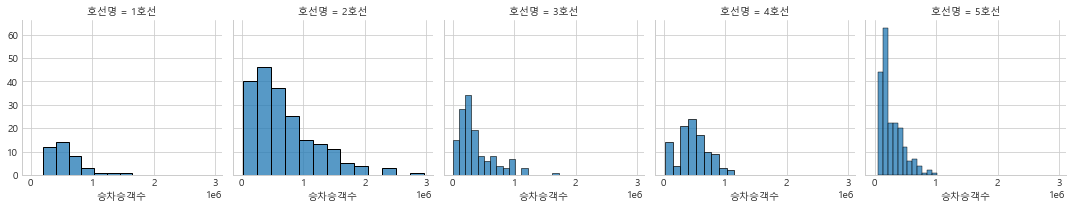

In [26]:
lee = sns.FacetGrid(df_merge, col="호선명")
lee.map(sns.histplot, "승차승객수")

In [27]:
df_merge["사용월"] = pd.to_datetime(df_merge["사용월"])


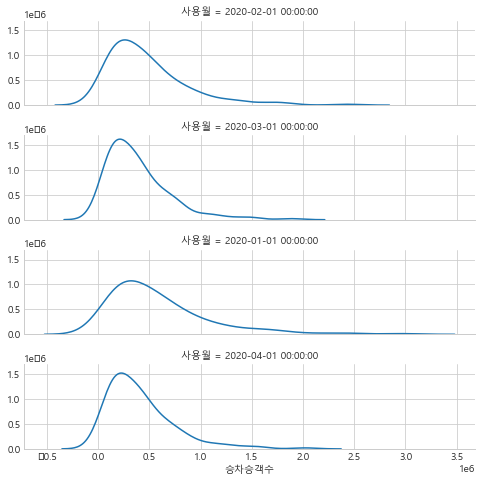

In [28]:
ordered_days = df_merge.사용월.value_counts().index
g = sns.FacetGrid(df_merge, row="사용월", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "승차승객수")

In [29]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용월     684 non-null    datetime64[ns]
 1   호선명     684 non-null    object        
 2   역ID     684 non-null    int64         
 3   지하철역    684 non-null    object        
 4   승차승객수   684 non-null    int32         
 5   하차승객수   684 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 26.8+ KB


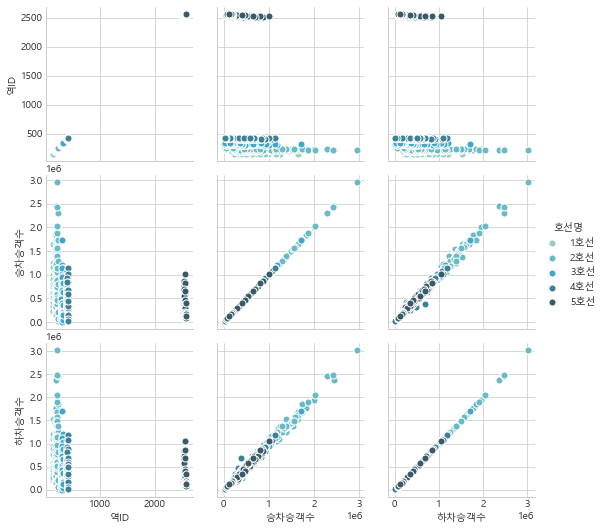

In [30]:
g = sns.PairGrid(df_merge, hue="호선명", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

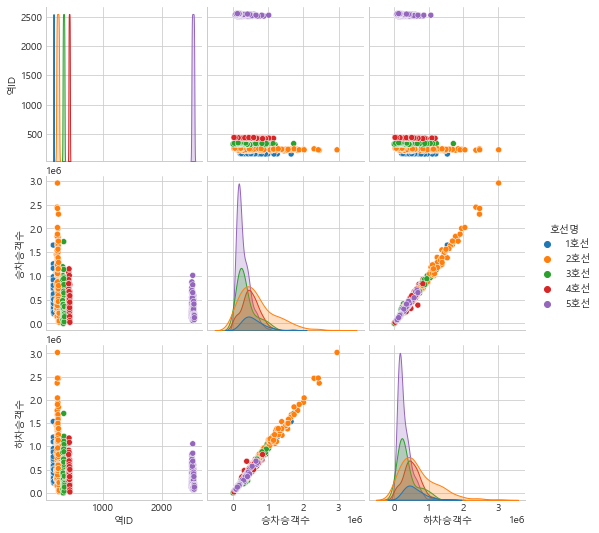

In [31]:
sns.pairplot(df_merge, hue="호선명", height=2.5)

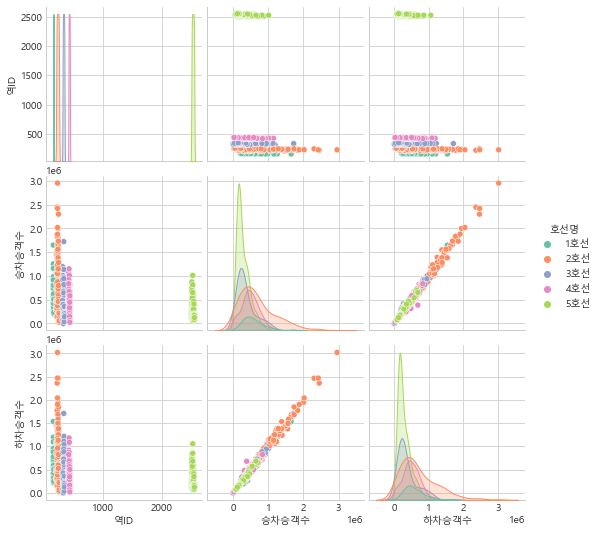

In [32]:
g = sns.pairplot(df_merge, hue="호선명", palette="Set2", diag_kind="kde", height=2.5)

In [33]:
df_merge


,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01-01,1호선,150,서울역,1650264,1534553
1,2020-01-01,1호선,151,시청,730464,740806
2,2020-01-01,1호선,152,종각,1254792,1200414
3,2020-01-01,1호선,153,종로3가,983376,934675
4,2020-01-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
679,2020-04-01,5호선,2557,방이,154757,158256
680,2020-04-01,5호선,2558,오금,80702,79638
681,2020-04-01,5호선,2559,개롱,138480,143504
682,2020-04-01,5호선,2560,거여,169334,158500


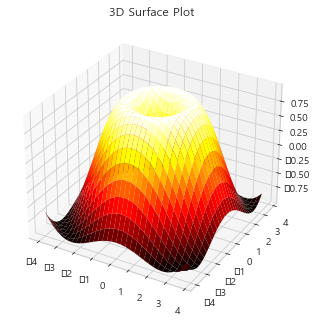

In [34]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
XX, YY = np.meshgrid(X, Y)
RR = np.sqrt(XX**2 + YY**2)
ZZ = np.sin(RR)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("3D Surface Plot")
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot')
plt.show()

In [35]:
lee = df_merge[(df_merge["사용월"]=="2020-01-01") & (df_merge["지하철역"]=="강남")]

In [36]:
lee

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
31,2020-01-01,2호선,222,강남,2956957,3020692


In [37]:
lee1 = df_merge.query("지하철역 == '강남' | 지하철역 == '교대(법원.검찰청)' | 지하철역 == '이태원' | 지하철역 == '홍대입구' | 지하철역 == '신촌'")

In [38]:
lee1 = lee1[lee1["사용월"]=="2020-01-01"]

In [39]:
lee1

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
31,2020-01-01,2호선,222,강남,2956957,3020692
32,2020-01-01,2호선,223,교대(법원.검찰청),1006983,1144253
48,2020-01-01,2호선,239,홍대입구,2302230,2465464
49,2020-01-01,2호선,240,신촌,1288023,1317149
81,2020-01-01,3호선,330,교대(법원.검찰청),413026,263921


<AxesSubplot:xlabel='지하철역', ylabel='승차승객수'>

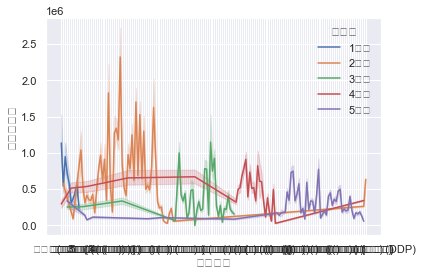

In [40]:
sns.set_theme(style="darkgrid")



sns.lineplot(x="지하철역", y="승차승객수",
             hue="호선명",
             data=df_merge)

<AxesSubplot:xlabel='사용월', ylabel='승차승객수'>

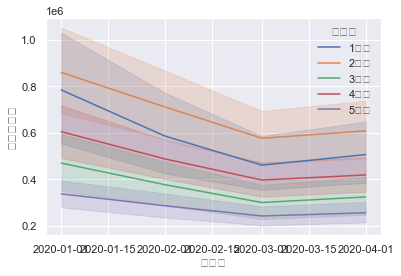

In [41]:
sns.set_theme(style="darkgrid")



sns.lineplot(x="사용월", y="승차승객수",
             hue="호선명",
             data=df_merge)

In [42]:
df_merge


,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01-01,1호선,150,서울역,1650264,1534553
1,2020-01-01,1호선,151,시청,730464,740806
2,2020-01-01,1호선,152,종각,1254792,1200414
3,2020-01-01,1호선,153,종로3가,983376,934675
4,2020-01-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
679,2020-04-01,5호선,2557,방이,154757,158256
680,2020-04-01,5호선,2558,오금,80702,79638
681,2020-04-01,5호선,2559,개롱,138480,143504
682,2020-04-01,5호선,2560,거여,169334,158500


In [74]:
import glob
nyc_subway_data = glob.glob('./dataset/2020년*')
print(nyc_subway_data)



['./dataset\\2020년 01월  교통카드 통계자료.xls', './dataset\\2020년 02월  교통카드 통계자료.xls', './dataset\\2020년 03월  교통카드 통계자료.xls', './dataset\\2020년 04월  교통카드 통계자료.xls', './dataset\\2020년05월교통카드통계자료.xls', './dataset\\2020년06월교통카드통계자료.xls', './dataset\\2020년07월교통카드통계자료.xls', './dataset\\2020년08월교통카드통계자료.xls', './dataset\\2020년09월교통카드통계자료.xls', './dataset\\2020년10월교통카드통계자료.xls', './dataset\\2020년11월교통카드통계자료.xls', './dataset\\2020년12월교통카드통계자료.xls']


In [75]:
subway1 = pd.read_excel(nyc_subway_data[0], sheet_name="지하철 노선별 역별 이용현황")
subway2 = pd.read_excel(nyc_subway_data[1], sheet_name="지하철 노선별 역별 이용현황")
subway3 = pd.read_excel(nyc_subway_data[2], sheet_name="지하철 노선별 역별 이용현황")
subway4 = pd.read_excel(nyc_subway_data[3], sheet_name="지하철 노선별 역별 이용현황")
subway5 = pd.read_excel(nyc_subway_data[4], sheet_name="지하철 노선별 역별 이용현황")
subway6 = pd.read_excel(nyc_subway_data[5], sheet_name="지하철 노선별 역별 이용현황")
subway7 = pd.read_excel(nyc_subway_data[6], sheet_name="지하철 노선별 역별 이용현황")
subway8 = pd.read_excel(nyc_subway_data[7], sheet_name="지하철 노선별 역별 이용현황")
subway9 = pd.read_excel(nyc_subway_data[8], sheet_name="지하철 노선별 역별 이용현황")
subway10 = pd.read_excel(nyc_subway_data[9], sheet_name="지하철 노선별 역별 이용현황")
subway11 = pd.read_excel(nyc_subway_data[10], sheet_name="지하철 노선별 역별 이용현황")
subway12 = pd.read_excel(nyc_subway_data[11], sheet_name="지하철 노선별 역별 이용현황")


In [76]:
df4 = pd.concat([subway1, subway2, subway3, subway4, subway5, subway6, subway7, subway8, subway9, subway10, subway11, subway12])
df4

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2020-01,1호선,150,서울역,"1,650,264","1,534,553",2020-02-03 12:19:56
1,2020-01,1호선,151,시청,"730,464","740,806",2020-02-03 12:19:56
2,2020-01,1호선,152,종각,"1,254,792","1,200,414",2020-02-03 12:19:56
3,2020-01,1호선,153,종로3가,"983,376","934,675",2020-02-03 12:19:56
4,2020-01,1호선,154,종로5가,"762,484","758,771",2020-02-03 12:19:56
...,...,...,...,...,...,...,...
598,2020-12,우이신설선,705,북한산보국문,"126,781","124,337",2021-01-03 09:36:40
599,2020-12,우이신설선,706,정릉,"96,501","92,058",2021-01-03 09:36:40
600,2020-12,우이신설선,707,성신여대입구(돈암),"65,933","71,709",2021-01-03 09:36:40
601,2020-12,우이신설선,708,보문,"33,909","34,610",2021-01-03 09:36:40


In [77]:
df4["승차승객수"] = df4["승차승객수"].apply(lambda x: x.replace(',', ''))
df4["하차승객수"] = df4["하차승객수"].apply(lambda x: x.replace(',', ''))
df4["승차승객수"] = df4["승차승객수"].astype(int)
df4["하차승객수"] = df4["하차승객수"].astype(int)
del df4["작업일시"]

In [78]:
df4 = df4[df4.호선명 != "9호선2~3단계"]
df4 = df4[df4.호선명 != "공항철도 1호선"]
df4 = df4[df4.호선명 != "9호선"]
df4 = df4[df4.호선명 != "8호선"]
df4 = df4[df4.호선명 != "7호선"]
df4 = df4[df4.호선명 != "6호선"]
df4 = df4[df4.호선명 != "경강선"]
df4 = df4[df4.호선명 != "수인선"]
df4 = df4[df4.호선명 != "경춘선"]
df4 = df4[df4.호선명 != "경의선"]
df4 = df4[df4.호선명 != "장항선"]
df4 = df4[df4.호선명 != "중앙선"]
df4 = df4[df4.호선명 != "일산선"]
df4 = df4[df4.호선명 != "분당선"]
df4 = df4[df4.호선명 != "과천선"]
df4 = df4[df4.호선명 != "안산선"]
df4 = df4[df4.호선명 != "경원선"]
df4 = df4[df4.호선명 != "경인선"]
df4 = df4[df4.호선명 != "경부선"]
df4 = df4[df4.호선명 != "우이신설선"]

In [79]:
df4

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01,1호선,150,서울역,1650264,1534553
1,2020-01,1호선,151,시청,730464,740806
2,2020-01,1호선,152,종각,1254792,1200414
3,2020-01,1호선,153,종로3가,983376,934675
4,2020-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
426,2020-12,5호선,433,개롱,133502,140749
427,2020-12,5호선,434,거여,170769,164609
428,2020-12,5호선,435,마천,131704,133781
429,2020-12,5호선,436,미사,284891,283932


In [80]:
df4["사용월"] = pd.to_datetime(df4["사용월"])
df4


,사용월,호선명,역ID,지하철역,승차승객수,하차승객수
0,2020-01-01,1호선,150,서울역,1650264,1534553
1,2020-01-01,1호선,151,시청,730464,740806
2,2020-01-01,1호선,152,종각,1254792,1200414
3,2020-01-01,1호선,153,종로3가,983376,934675
4,2020-01-01,1호선,154,종로5가,762484,758771
...,...,...,...,...,...,...
426,2020-12-01,5호선,433,개롱,133502,140749
427,2020-12-01,5호선,434,거여,170769,164609
428,2020-12-01,5호선,435,마천,131704,133781
429,2020-12-01,5호선,436,미사,284891,283932


In [81]:
del df4["역ID"]

In [82]:
df4

,사용월,호선명,지하철역,승차승객수,하차승객수
0,2020-01-01,1호선,서울역,1650264,1534553
1,2020-01-01,1호선,시청,730464,740806
2,2020-01-01,1호선,종각,1254792,1200414
3,2020-01-01,1호선,종로3가,983376,934675
4,2020-01-01,1호선,종로5가,762484,758771
...,...,...,...,...,...
426,2020-12-01,5호선,개롱,133502,140749
427,2020-12-01,5호선,거여,170769,164609
428,2020-12-01,5호선,마천,131704,133781
429,2020-12-01,5호선,미사,284891,283932
